<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 3</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Juan Pablo Jorquera;201573533-6</h3>
    <h3 align="center">David Medel;201573548-4</h3>
    <h3 align="center">Diciembre de 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 31 de diciembre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea. El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.

**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. Ley de Zipf y NLP (30p)


#### Zipf

La ley de Zipf corresponde a una ley empírica elaborada por George Kingsley Zipf, lingüista americano. Esta ley dice que la distribución de palabras en un texto es de libre escala. Este fenómeno se evidenció en el idioma inglés y, después, se expandió a todos los otros idiomas. Su popularidad es tal, que se tiende a asociar a Zipf con leyes de potencia más allá del ámbito lingüista, se habla de comportamiento "zipfiano".

Para trabajar con esta ley es necesario analizar texto/s de gran extensión, formalmente conocidos como corpus. En este caso, trabajarán con una selección de libros en formatos .txt [disponibles aqui](https://www.gutenberg.org/browse/scores/top). No es necesario que los descargue todos, mínimo 3, máximo una cantidad que su computador pueda procesar en un tiempo decente para usted.

> a) Con los libros que usted seleccionó haga un gráfico en el que se muestren las 10 palabras de mayor frecuencia. ¿Qué puede decir acerca de las palabras que aparecen? 

> b) Del universo de palabras que puede construir mediante el análisis de texto ¿Cuál es la probabilidad de que, al elegir al azar una de ellas, obtenga una palabra rara? **Palabra rara:** su frecuencia de aparición es 1.

> c) ¿Se podría establecer alguna relación entre la probabilidad de encontrar $N$ palabras raras (su frecuencia de aparición es 1) en función del largo del texto analizado? ¿Hay alguna relación con b)? Fundamente. Pruebe para 3-5 valores distintos de $N$.

*Hint: podría ir leyendo por partes y cada vez seleccionando partes de mayor o menor largo.*

Para clasificar un texto (asignarles palabras o temas claves) se necesitan utilizar palabras características. Utilizando la ley de zipf se tiene que los extremos de la distribución no son útiles. Las palabras más comunes estarían presentes en casi todos los textos y las menos frecuentes no estarían en ninguno.

> d) En base a lo anterior seleccione 2 palabras que usted utilizaría para clasificar los textos analizados (el conjunto entero). Para las dos palabras $(w_1,w_2)$ seleccionadas se plantea la siguiente pregunta ¿La ocurrencia de $w_1$ en un texto es independiente de la presencia de $w_2$ en el mismo texto?. Debido que la cantidad de libros podría no ser suficiente para mostrar esto, es posible considerar sub-secciones como "mismo texto", por ejemplo, los capítulos. 

* Usted debe hacer la partición útil de la distribución según su criterio. No use stopwords para $w_1,w_2$ (¿No sabe lo que es una stopword? [Pinche aqui](https://www.google.com/)). Los extremos no sirven así que deberá buscar en otra parte.
* Explique el prodecimiento que realizará para mostrar la independencia o no independencia de las palabras.

----

Es muy posible que su corpus no pueda ser adjuntado junto a su laboratorio. Debido a esto, debe referenciar el sitio de donde descargó su corpus en el README.

### Respuesta 

Inicialmente se listará los diez libros (y archivos) utilizados para trabajar para luego continuar trabajando parte por parte. Dichos libros fueron obtenidos del [proyecto gutenberg](https://www.gutenberg.org/browse/scores/top).

Libros seleccionados y archivo asociado:
- Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley - frankenstein.txt
- Moby Dick; Or, The Whale by Herman Melville - moby_dick.txt
- A Modest Proposal by Jonathan Swift - modest_proposal.txt
- The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson - jekyll_hyde.txt
- A Tale of Two Cities by Charles Dickens - two_cities.txt
- Pride and Prejudice by Jane Austen - pride_prejudice.txt
- Beowulf: An Anglo-Saxon Epic Poem by J. Lesslie Hall - beowulf.txt
- Dracula by Bram Stoker - dracula.txt
- Metamorphosis by Franz Kafka - metamorphosis.txt
- Ulysses by James Joyce - ulysses.txt

Para acelerar el proceso de ejecución, se adjunta el archivo "corpus.txt" con el cuerpo de dichos libros y realizando la limpieza de los textos para trabajar con palabras, además, se añadió el script para la generación del corpus en el archivo "armarCorpus.py". Cabe destacar que en dicho script, también se realizó una limpieza de los textos, para la consideración adecuada de palabras se eliminaron símbolos y se normalizó el texto a minúsculas. Es posible que dicho filtrado haya generado casos erróneos como las letras con acentos, pero se consideró que dichos casos son ínfimos con respecto al tamaño de los textos.

In [255]:
# Incluir librerías a utilizar a lo largo del informe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import re
import string

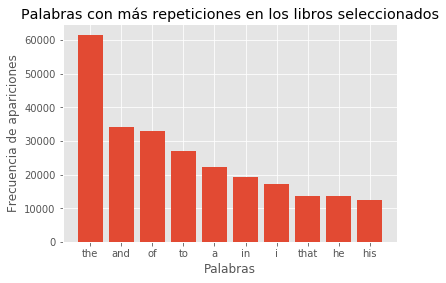

In [261]:
# Función para realizar conteo de palabras y frecuencias
def conteoPalabras(nombreArchivo):
    nLineas = 0
    nPalabras = 0
    cuenta_palabras = dict()
    corpus = open('./'+nombreArchivo, 'r')
    for linea in corpus:
        nLineas += 1
        for palabra in linea.split():
            nPalabras += 1
            # Contabilizar palabras
            if palabra in cuenta_palabras:
                cuenta_palabras[palabra] += 1
            else:
                cuenta_palabras[palabra] = 1
    corpus.close()
    return cuenta_palabras, nLineas, nPalabras
      
cuenta_palabras, nLineas, nPalabras = conteoPalabras('corpus.txt')
df = pd.DataFrame(list(cuenta_palabras.items()), columns=('palabra', 'frecuencia'))
df.sort_values(by=['frecuencia'], ascending=False, inplace=True)

# Graficar
style.use('ggplot')
plt.bar(df.head(10)['palabra'].tolist(), df.head(10)['frecuencia'].tolist(), align='center')
plt.title('Palabras con más repeticiones en los libros seleccionados')
plt.ylabel('Frecuencia de apariciones')
plt.xlabel('Palabras')
plt.show()

> a) Con los libros que usted seleccionó haga un gráfico en el que se muestren las 10 palabras de mayor frecuencia. ¿Qué puede decir acerca de las palabras que aparecen? 

Para ello, se tomaron los diez libros seleccionados como corpus, simulando un libro más grande. Sobre las palabras podemos decir que las que más se repiten son artículos o pronombres, es decir, palabras que se utilizan para componer oraciones por sobre palabras que conlleven contenido y que son consideradas stopwords.

> b) Del universo de palabras que puede construir mediante el análisis de texto ¿Cuál es la probabilidad de que, al elegir al azar una de ellas, obtenga una palabra rara? **Palabra rara:** su frecuencia de aparición es 1.

In [193]:
cuenta_rara = 0
total = 0
for palabra in cuenta_palabras:
    cuenta_pal_actual = cuenta_palabras[palabra]
    if cuenta_pal_actual == 1:
        cuenta_rara += 1
    total += cuenta_pal_actual

probabilidad = round(cuenta_rara/total, 5)
print('La probabilidad de obtener una palabra rara es de: ', probabilidad)

La probabilidad de obtener una palabra rara es de:  0.02238


Como se puede ver, hay una muy baja probabilidad de obtener una palabra rara con aproximadamente un 2,2%; lo que concuerda con el crecimiento de libre escala, en donde las palabras más comunes crecen más, aislando las palabras raras.

> c) ¿Se podría establecer alguna relación entre la probabilidad de encontrar $N$ palabras raras (su frecuencia de aparición es 1) en función del largo del texto analizado? ¿Hay alguna relación con b)? Fundamente. Pruebe para 3-5 valores distintos de $N$.

[25.2   26.775 28.35  29.925 31.5  ]
[31.5   34.125 36.75  39.375 42.   ]
[ 42.    57.75  73.5   89.25 105.  ]
[105.   131.25 157.5  183.75 210.  ]
21077 43525
22138 41851
27003 38862
28737 37521
29853 35101
29853 35101
29602 32004
28742 30226
27125 27900
25472 25908
25472 25908
19048 19090
14896 14905
12223 12226
10363 10363
10363 10363
8305 8306
6930 6930
5946 5946
5181 5181


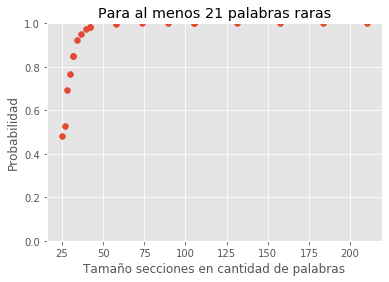

[[1.         0.52674036]
 [0.52674036 1.        ]]
[39.6   42.075 44.55  47.025 49.5  ]
[49.5   53.625 57.75  61.875 66.   ]
[ 66.    90.75 115.5  140.25 165.  ]
[165.   206.25 247.5  288.75 330.  ]
4131 27900
7486 25908
9828 24730
13032 23151
14542 22206
14542 22206
16282 20530
16787 19090
16553 17838
15818 16486
15818 16486
12029 12090
9447 9462
7772 7772
6594 6594
6594 6594
5282 5282
4405 4405
3778 3778
3297 3297


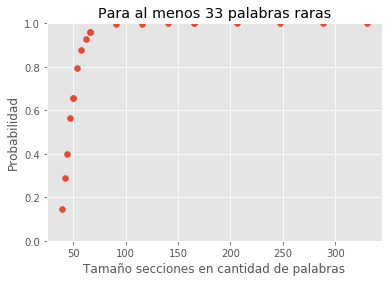

[[1.        0.5811929]
 [0.5811929 1.       ]]
[54.    57.375 60.75  64.125 67.5  ]
[67.5   73.125 78.75  84.375 90.   ]
[ 90.   123.75 157.5  191.25 225.  ]
[225.   281.25 337.5  393.75 450.  ]
842 20150
1885 19090
3124 18135
5316 17002
6941 16240
6941 16240
9390 14905
10562 13950
11187 12954
11061 12090
11061 12090
8757 8846
6918 6930
5697 5697
4836 4836
4836 4836
3872 3872
3228 3228
2768 2768
2418 2418


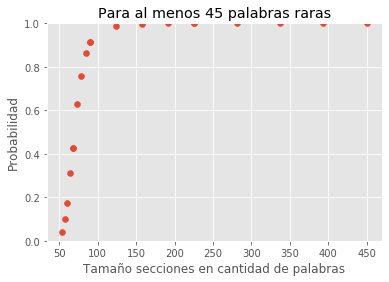

[[1.         0.63988164]
 [0.63988164 1.        ]]
[69.6  73.95 78.3  82.65 87.  ]
[ 87.    94.25 101.5  108.75 116.  ]
[116.  159.5 203.  246.5 290. ]
[290.  362.5 435.  507.5 580. ]
120 15770
350 14905
939 13950
1703 13269
2969 12507
2969 12507
4936 11575
6486 10773
7464 10075
7892 9380
7892 9380
6730 6843
5332 5360
4422 4423
3752 3752
3752 3752
3005 3005
2501 2501
2146 2146
1876 1876


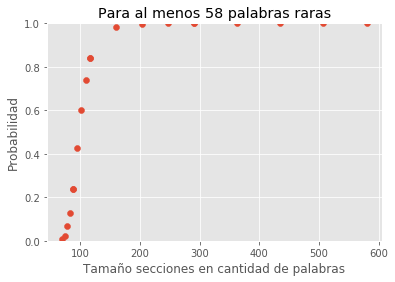

[[1.         0.69444301]
 [0.69444301 1.        ]]
[ 86.4  91.8  97.2 102.6 108. ]
[108. 117. 126. 135. 144.]
[144. 198. 252. 306. 360.]
[360. 450. 540. 630. 720.]
18 12652
91 11957
274 11217
553 10668
1124 10075
1124 10075
2331 9300
3729 8636
4802 8060
5489 7556
5489 7556
5334 5495
4283 4318
3552 3556
3022 3022
3022 3022
2418 2418
2015 2015
1727 1727
1511 1511


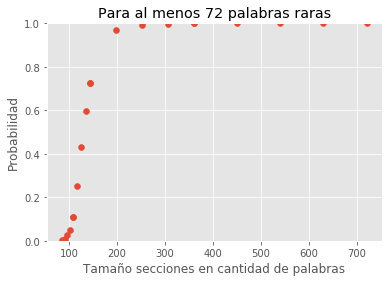

[[1.         0.74269007]
 [0.74269007 1.        ]]


In [379]:
# Función para contar palabras y frecuencias según cierto tamaño de secciones
# en cantidad de palabras
def cuentaPalabras(tamPalabras):
    cuenta_parte = dict()
    palabrasLeidas = 0
    cantidad_raras = list()
    corpus = open('./corpus.txt', 'r')
    for linea in corpus:
        for palabra in linea.split():
            # Contabilizar palabras
            if palabra in cuenta_parte:
                cuenta_parte[palabra] += 1
            else:
                cuenta_parte[palabra] = 1
            palabrasLeidas += 1
            # Finalizar revisión parte actual
            if palabrasLeidas == (tamPalabras):
                cuenta_rara = 0
                # Conteo palabras raras
                for palabra in cuenta_parte:
                    cuenta_pal_actual = cuenta_parte[palabra]
                    if cuenta_pal_actual == 1:
                        cuenta_rara += 1
                # Calcular resultado
                cantidad_raras.append(cuenta_rara)
                # Resetear variables
                cuenta_parte.clear()
                palabrasLeidas = 0
    corpus.close()
    df_probs = pd.DataFrame(cantidad_raras, columns = ['nRaras'])
    #display(df_probs)
    return df_probs

avgProbabilidades = list()
#largoPartesEnPalabras = [1000, 5000, 10000, 15000, 25000]
nPalabrasRaras = [21, 33, 45, 58, 72]
#largoPartesEnPalabras = [2, 5, 10, 20, 100, 500, 1000, 5000]
#largoPartesEnPalabras = np.concatenate((range(8,20,1),range(20, 50, 2),range(50,100,10)))
probabilidades = []
for n in nPalabrasRaras:
    #largoPartesEnPalabras = np.concatenate((range(int(n*1.3), int(n*1.7), 2), range(int(n*1.7), int(n*5), 10), ))
    rango1 = np.linspace(1.2*n, 1.5*n, 5)
    rango2 = np.linspace(1.5*n, 2*n, 5)
    rango3 = np.linspace(2*n, 5*n, 5)
    rango4 = np.linspace(5*n, 10*n, 5)
    print(rango1)
    print(rango2)
    print(rango3)
    print(rango4)
    largoPartesEnPalabras = np.concatenate((rango1, rango2, rango3, rango4))
    for largo in largoPartesEnPalabras:
        # Contar palabras
        df_aux = cuentaPalabras(int(largo))
        # Analizar exitos
        df_aux2 = df_aux['nRaras'].apply(lambda x: 0 if x<n else 1)#x/largo)
        # Calcular promedio total para al menos n palabras raras
        exitos = df_aux2.sum()
        nPartes = df_aux2.count()
        print(exitos, nPartes)
        probabilidades.append(exitos/nPartes)
    # Graficar
    plt.scatter(largoPartesEnPalabras, probabilidades)
    axes = plt.gca()
    axes.set_ylim([0, 1])
    #axes.set_xlim([0, 1000])
    plt.title('Para al menos '+str(n)+' palabras raras')
    plt.xlabel('Tamaño secciones en cantidad de palabras')
    plt.ylabel('Probabilidad')
    #plt.xscale('log')
    plt.show()
    
    print(np.corrcoef(largoPartesEnPalabras, probabilidades))
    probabilidades.clear()

In [369]:
#?np.corrcoef
np.random.uniform(1,10,3)

array([1.20587785, 6.29257093, 4.63462719])

In [189]:
cuenta_palabras
df = pd.DataFrame(cuenta_palabras.items(), columns=['Palabra', 'Frecuencia'])
df.sort_values(by='Frecuencia', inplace=True)
df[(df.Frecuencia>5)].sort_values(by='Frecuencia', ascending=False).head(4000000)

,Palabra,Frecuencia
12,the,61566
20,and,34089
14,of,32826
78,to,26984
127,a,22360
115,in,19219
102,i,17132
89,that,13679
276,he,13634
280,his,12518


In [190]:
print(nPalabras)
cuentaPalabras(nPalabras)

1088137


,Probabilidad
0,0.02238


**D)**

,Palabra,Frecuencia,Probabilidad
24700,pieman,1,9.190019e-07
31240,leeds,1,9.190019e-07
31241,eatin,1,9.190019e-07
31242,herrins,1,9.190019e-07
31243,drinkin,1,9.190019e-07
31247,ageeanwards,1,9.190019e-07
31250,crammle,1,9.190019e-07
31253,bellytimber,1,9.190019e-07
31254,sairly,1,9.190019e-07
31256,manyand,1,9.190019e-07


1.0 5.0


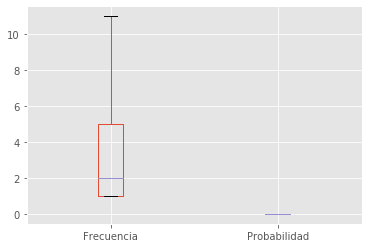

In [251]:
'''covar = df_prob_tam.cov()['Probabilidad promedio'][0]
x = df_prob_tam['Cantidad palabras'].std()
y = df_prob_tam['Probabilidad promedio'].std()
res = covar/(x*y)
res'''
df['Probabilidad'] = df['Frecuencia']/nPalabras
p_25 = df.Frecuencia.quantile(0.25)
p_75 = df.Frecuencia.quantile(0.75)
df_filtrado = df[(df['Frecuencia'] >= p_25) & (df['Frecuencia'] <= p_75)]
bins = [0,10,20,30,40,50,60,70,80,90,100]
display(df_filtrado)
print(p_25, p_75)
df.boxplot(showfliers=False)
#df
#plt.hist(df['Frecuencia'], bins=[0,1,2,10,50,100,1000])
#plt.show()

In [ ]:
df['Frecuencia']

# 2. MCMC Decryption (40p)

La seguridad es un tema que desde tiempos inmemoriables ha sido utilizado en el envío de mensajes. Desde el *shift* de letras en $x$ posiciones hasta algoritmos complejos de encriptación que tienen a los computadores años intentando descifrarlos. Uno de los algoritmos utilizados para encriptar corresponde al de sustitución. Este algoritmo consiste en tener un hash con los pares (llave, valor) donde la letra que corresponde a la llave se reemplaza por la letra que corresponda a valor. Por ejemplo: 


```Python

Llave = "ITBLPHWZAREJXNFVOUDMCGYKQS"

Mensaje_Original = "Hola ¿qué tal?"

Mensaje_Encriptado = "ZFJI OCP MIJ"  #(notar que se ignoró puntuación y tilde)

Llave_Desencriptacion = "ICUSKOVFALXDTNQEYJZBRPGMWH"

```


#### ¿Cómo interpretar la llave? 

Dada una llave de la forma $x_{1}x_{2}x_{3}\dots x_{n}$ con $n$ largo del alfabeto inglés (A hasta Z sin Ñ)
la primera letra reemplazará a la "A", la segunda a "B", la tercera a "C" y así hasta la "Z". 

**Ejemplo pequeño:** 

"ABCD" lo encriptaré con la siguiente llave "CADB", la llave para desencriptar el mensaje es la siguiente "BDAC".

1. Encripto "CADA" con "CADB" $\rightarrow$ "DCBC"
2. Descencripto "DCBC" con "BDAC" $\rightarrow$ "CADA"

Esta será la nomenclatura que se utilizará al momento de presentar las llaves. 

#### Problema

A usted le han entregado un texto encriptado mediante sustitución, pero no conoce la llave que se utilizó originalmente para encriptarlo. Un enfoque fuerza bruta para descifrarlo implica que usted probará las $26!$ posibles combinaciones para desencriptar el texto. Claramente, probar semejante cantidad lo tendrá esperando una respuesta hasta mucho después de la fecha de entrega del laboratorio. 

Para resolver este problema se le plantea un método muy útil para resolver este problema en un tiempo mucho más prudente: cadenas de Markov con el método de Montecarlo (MCMC). El procedimiento es el siguiente: 

##### 1. Analizar Texto del idioma original

Es necesario tener una noción de la estructura del lenguaje origen del mensaje. Descifrar un mensaje en chino (5000 caractes que se utilizan en la vida diaria aprox) o descifrar un mensaje en inglés (26 letras solamente) no
utilizarán el mismo criterio para detectar estructura. 

En este caso trabajará con el idioma inglés y deberá buscar un texto en inglés bastante extenso (Corpus) o compilado de textos extensos para analizar las frecuencias. Para el idioma inglés se sugiere contar las frecuencias de a pares de caracteres, solamente utilice las 26 letras y el espacio " " para contar frecuencias.
Por ejemplo: "AH"," A", "A ", "BA", (el orden de aparición si importa en este caso). 

Recuerde que para los lenguajes de programación "a" y "A" no son lo mismo, pero para efectos del desencriptado sí.

#### 2. Métrica de Desempeño 

El método que se proponE consiste en probar llaves de desencriptación aleatorias. Si no se define una forma para comparar una propuesta de otra, se tendrá el mismo proceso que el de probar todas las posibilidades hasta achuntarle. Se creará una métrica de desempeño que asigne un puntaje a cierta llave para ir optando por llaves que tiendan a un mayor puntaje.

La métrica que se sugiere es:

$$
 Puntaje = \prod Frecs("Par")^{Ocurrencias("Par")}
$$

Donde "Frecs("Par")" corresponde a la frecuencia del par ("AH" por ejemplo) en el análisis de texto realizado en el paso 1 y "Ocurrencias("Par")" corresponde a la frecuencia de dicho par **en el texto desencriptado con la llave propuesta**. Para facilitar los cálculos es recomendable utilizar $log(Puntaje)$ como métrica final. La métrica sugerida es proporcional a la máxima verosimilitud.

#### 3. Decisiones 

Para decidir si nos quedaremos con la solución actual o la solución propuesta haremos lo siguiente: 

* Si el puntaje de la solución actual es menor que el de la solución propuesta, nuestra propuesta actual será actualizada por la solución propuesta para la siguiente iteración. 

* Si el puntaje de la solución actual es mayor que el de la solución propuesta, se tirará una moneda cuya probabilidad de **cara** sea $\frac{Score\,Propuesta}{Score\,Actual}$, si sale cara optaremos por la solución propuesta.

#### 4. Procedimiento 

1. Elegimos alguna llave para desencriptar inicial, la que se quiera.
2. La llave propuesta será una variación de la llave actual permutando 2 elementos de ésta. 
3. Se toman las decisiones como el punto "Decisiones" indica. 
4. Repetir 2 y 3 varias veces. Se recomienda iterar 10000 veces o mas.
5. Terminadas las iteraciones se retornar el texto desencriptado junto a la llave de desencriptación.

>**Importante:** Es posible que al desencriptar el mensaje su resultado final no parezca tener sentido aunque
tenga todo bien programado. Esto es debido al azar así que corra su algoritmo unas cuantas veces si el primer
resultado no parece tener sentido antes de corregir el código. (En mis intentos, por lo general unas 3-5 veces era suficiente si no funcionaba a la primera). 


* Los textos encriptados que se le han facilitado se encuentran en el archivo "cifrados.txt"
* Los textos 1, 2 y 3 fueron encriptados utilizando la misma llave.
* El texto 4 es el mismo mensaje del texto 1 pero encriptado con otra llave.
* El texto 2 fue escrito originalmente en español (se reemplazó Ñ por N para mantener el tamaño del alfabeto) y los textos 1, 3 y 4 en inglés.

>a) Analice la métrica de desempeño y explique lo que intenta lograr ¿Qué es lo que se premia? 

>b) Desencripte el texto 1 utilizando el método explicado. 

>c) Desencripte el texto 2 utilizando el método explicado y el **análisis de texto en inglés**. De lo que obtuvo ¿Qué puede decir acerca de desencriptar un lenguaje distinto del analizado? ¿Qué puede decir acerca de la estructura de ambos lenguajes?

>d) Desencripte el texto 3 utilizando el método explicado. *Hint: Texto 1*.

>e) Desencripte el texto 4 utilizando el método explicado. Compare con lo obtenido en b) ¿La llave que se utiliza para encriptar tiene importancia en el resultado?

>f) ¿A qué se debe que al correr varias veces su algoritmo se pueda obtener un mensaje entendible, pero con distintas llaves de desencriptación? ¿Qué puede decir acerca del método, es determinista o estocástico? 

>g) **Bonus +5** Plantee una estrategia para desencriptar el texto 2 que está en español. Obtendrá otros 5 puntos si logra desencriptarlo, pero recuerde que la Ñ se reemplazó por N.

---
Es posible que al descifrar le quede un mensaje con pequeños errores, por ejemplo, "HSTO NO CONCUHRDA", si este es su caso, puede intentar sacar el mensaje original haciendo estas correcciones a mano. 

---

**Desarrollo 2**


In [5]:
archivo = open('cifrados.txt', 'r')
texto_1 =[]
texto_2 =[]
texto_3 =[]
texto_4 =[]
for linea in archivo:
    linea = linea.strip()
    if linea == "Texto 1":
        linea= archivo.readline()
        texto_1.append(linea.strip())
    if linea == "Texto 2":
        linea = archivo.readline()
        texto_2.append(linea.strip())
    if linea == "Texto 3":
        linea = archivo.readline()
        texto_3.append(linea.strip())
    if linea == "Texto 4":
        linea = archivo.readline()
        texto_4.append(linea.strip())


## 3. Regresión Lineal y Bootstrap (30p)

### Introducción a Método Bootstrap

Suponga que tiene una muestra  <b>M</b> de una población <b>P</b> y esta muestra <b>M</b> es de tamaño <b>N</b>. Queremos obtener algún estimador $ \theta $ de <b>P</b> a partir de <b>M</b> ya sea la media, varianza, o alguna otra función que interese, obviamente este estimador tendrá un error asociado ya que no es el estimador de la población. Uno de los métodos para determinar intervalos de confianza es el método bootstrap que permite trabajar solamente con una muestra de la población.

Podemos entender bootstrap de la siguiente manera: Suponga que tenemos en una bolsa papelitos con cada elemento de la muestra <b>M</b>, sacamos un papelito, <b>lo volvemos a guardar en la bolsa</b> y repetimos este proceso <b>N</b> veces hasta tener una muestra $M^{1*}$ y sobre esta muestra de la muestra aplicamos la función que queremos conocer (media, varianza, etc) teniendo un estimador $ \theta ^{1*} $ . Luego repetimos este proceso <b>B</b> veces y terminamos con un conjunto de <b>B</b> estimadores. 

Una forma de construir intervalos de confianza con el método bootstrap es utilizar los percentiles. Si queremos un intervalo de 90% de confianza, utilizamos un intervalo **simétrico** que vaya desde el percentil $X$ hasta el percentil $Y$ de manera que $Y-X = 0.90$. En el ejemplo anterior serían los percentiles 5% y 95%.

[Método Bootstrap](https://www.youtube.com/watch?v=ZCXg64l9R_4)

### El problema

Usted cuenta con un registro histórico del clima de Szeged, Hungría. Tiene datos comprendidos entre el 2006 y 2016, entre ellos están la temperatura (en °C), la humedad, velocidad del viento (Km/h) y la presión (milibar). Usted trabajará con las 4 columnas mencionadas e intentará encontrar alguna relación entre estas variables.

[Dataset aqui](https://www.kaggle.com/budincsevity/szeged-weather)

> a) Calcule la correlación entre los pares posibles de las 4 columnas mencionadas e indique entre cuáles de ellas hay relación y el tipo de relación.

> b) Construya un modelo de regresión lineal donde se utilice la temperatura para predecir la humedad, indique los valores del coeficiente de posición y la pendiente.

> c) Construya un intervalo de confianza del 95% para el coeficiente de posición, sin utilizar bootstrap. Construya el mismo intervalo con el método bootstrap utilizando tamaños $\frac{N}{2}$ y $N$ , ambos se deben realizar $2000$ veces. Compare los 3 intervalos y comente.

*Hint: Hay varios modelos involucrados*

> d) Un amigo suyo que había trabajado previamente con este conjunto de datos le dijo que no existía relación lineal entre la temperatura y la humedad. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia. 

*Hint: Tiene que ver con la pendiente*

> e) Su amigo también le dijo que no existía una relación lineal entre la temperatura y la presión. Usted decide verificar esto aplicando un test de hipótesis con un 95% de significancia.

> f) Calcule el [mse](https://es.wikipedia.org/wiki/Error_cuadr%C3%A1tico_medio) del modelo obtenido en b). Se le ha propuesto la opción de realizar 3 modelos utilizando 3 intervalos de temperatura: 

* $\left(-\infty,0\right]$
* $ \left(0,20\right]$
* $\left(20,+\infty \right]$

Utilizando el método propuesto calcule el nuevo $ MSE^{*} = MSE_1 + MSE_2 + MSE_3$ y compárelo con el $MSE_b$ (el de b). ¿Es esta propuesta mejor o peor que la realizada con anterioridad?



**Desarrollo 3**


Se procede a calcular el coeficiente de correlación entre todos los pares posibles de las cuatro columnas mencionadas, este coeficiente se calculará bajo la siguiente fórmula:

$$
\rho_{X, Y}=\frac{\operatorname{cov}(X, Y)}{\sqrt{\operatorname{Var}(X)} \sqrt{\operatorname{Var}(Y)}}
$$

El valor del coeficiente de correlación entre el par de datos X,Y , indicará el tipo de relación de estos, de la siguiente forma:

*  Si r = 1, existe una correlación positiva perfecta. Relación **directa**
*  Si 0 < r < 1, existe una correlación positiva.
*  Si r = 0, no existe relación lineal. **Variables son independientes**
*  Si -1 < r < 0, existe una correlación negativa.
*  Si r = -1, existe una correlación negativa perfecta. Relación **inversa**

**Nota:** Si $\operatorname{cov}(X, Y) = 0 \Rightarrow  \rho_{X,Y} = 0$
**Nota 2:** Si $\operatorname{cov}(X, Y) \Leftrightarrow \operatorname{cov}(Y, X) $


In [6]:
#leemos el archivo:
we = pd.read_csv("weatherHistory.csv")

#columnas
t = we['Temperature (C)'] #temperatura
h = we['Humidity'] #humedad
v = we['Wind Speed (km/h)'] #velocidad viento
p = we['Pressure (millibars)'] #presion

#definimos la funcion para el coef de correlación
def coef_correlacion(x,y):
    cov_xy = np.cov(x,y)[0][1]
    if cov_xy == 0:
        return 0
    else:
        var_x = np.var(x)
        var_y = np.var(y)
        den = np.sqrt(var_x)* np.sqrt(var_y)
        return cov_xy/den

#Calculamos el coeficiente de correlacion para los pares posibles: (t,h) (t,v) (t,p) (h,v) (h,p) (v,p)

print("Coeficientes de correlación\n")
print("Temperatura y Humedad            " + str(coef_correlacion(t,h))) 
print("Temperatura y Velocidad viento   " + str(coef_correlacion(t,v)))
print("Temperatura y Presión            " + str(coef_correlacion(t,p)))
print("Humedad y Velocidad viento       " + str(coef_correlacion(h,v)))
print("Humedad y Presión                " + str(coef_correlacion(h,p)))
print("Velocidad viento y Presión       " + str(coef_correlacion(v,p)))

Coeficientes de correlación

Temperatura y Humedad            -0.6322612301502698
Temperatura y Velocidad viento   0.00895706120821777
Temperatura y Presión            -0.005447162626738276
Humedad y Velocidad viento       -0.22495378814302325
Humedad y Presión                0.005454319810932256
Velocidad viento y Presión       -0.04926331626060574


> a) Calcule la correlación entre los pares posibles de las 4 columnas mencionadas e indique entre cuáles de ellas hay relación y el tipo de relación.

Según los valores de coeficiente de correlación presentados podemos concluir lo siguiente:

*  Relación **inversa** entre temperatura y humedad
*  Relación **directa** (NO EXISTE) entre temperatura y velocidad del viento
*  Relación **indirecta** (NO EXISTE) entre temperatura y presión
*  Relación **inversa** entre humedad y velocidad de viento
*  Relación **directa** (NO EXISTE) entre temperatura y humedad
*  Relación **inversa** entre temperatura y humedad


## Bonus Section 

### B.1 NLP (+10)

Natural Language Processing (NLP) corresponde al análisis del lenguaje natural para realizar estudios acerca de: análisis de sentimiento, patrones del discurso en la voz para los asistentes (Ok google, Alexa, etc.), entre otros. Debido a su utilidad y complejidad, creó su propia area de inteligencia artificial. En esta sección usted trabajará con algunos aspectos básicos de NLP.

Dentro del análisis de patrones en el texto hay una técnica que se llama *Pos Tagging* (Parts of Speech tagging) que corresponde a la asignación de un *tag* a una palabra, estos tags son: sustantivo, verbo, adeverbio, etc. 

Trabajára con las relaciones "antes de" y "después de", es decir, utilizará alguna estructura de datos conveniente para almacenar las palabras que vienen antes de $X$ y las que vienen después de $X$.


> a) Determine las probabilidades del *tag* sucesor dado el *tag* de la palabra (Pos Tagging). Realice esto para los 3 tags de mayor frecuencia.

> b) Determine las probabilidades del *tag* antecesor dado el *tag* de la palabra (Pos Tagging). Realice esto para los mismos tags de e) y comente. ¿Hay alguna relación con lo trabajado en e)?

Puede trabajar con 1 solo texto en esta sub-sección, si lo prefiere.

----

* [POS Tagging en Python](https://www.nltk.org/book/ch05.html)
* [POS Tagging en R](https://smart-statistics.com/part-speech-tagging-r/)

### B.2 Redes Complejas ft. TLC (+10)

En el laboratorio 2 usted conoció un tipo de modelo para generar redes complejas de libre escala. En este laboratorio se le presenta otro tipo de modelo, un poco más básico, cuyo proceso de generación es el siguiente:

1. Se inicializa la red con una cantidad fija de nodos $N$ 
2. Entre cada par de nodos existe una probabilidad $\rho$ de colocar una arista entre cada par de nodos.

Este proceso puede hacerse tanto de forma dirigida como no dirigida. 

#### Teorema del Límite Central 

El teorema del límite central es uno de los postulados más importantes de estadística.

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección comprobaremos el TLC utilizando el grafo descrito al inicio.

>a) Considerando la construcción del grafo ¿A qué distribución corresponde el proceso?

>b) En este caso nos interesa la distribución de **Grado Promedio**. En base a lo enunciado en el TLC identifique:

* Elementos de la muestra Aleatoria.
* La media de la distribución de grado promedio
* La varianza/std de la distribución de grado promedio.

Tanto para el caso **dirigido** como el **no dirigido**. En el caso dirigido se refiere a grado promedio de entrada y grado promedio de salida.


>c) Utilizando un $\rho$ fijo (a su elección, pero distinto de 0 y 1) genere la distribución de grado utilizando:

* 1000 grafos de 5 nodos
* 1000 grafos de 50 nodos
* 1000 grafos de 500 nodos
* 1000 grafos de 1000 nodos

**SOLO EN CASO NO DIRIGIDO**

Comparando los resultados obtenidos con su respuesta en b) ¿Es posible concluir que el teorema del límite central se cumple tanto para el grafo dirigido como no dirigido?


## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ En esta ocasión se podrán realizar consultas hasta el 4 de noviembre a las 15:00h.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)